In [1]:
import pandas as pd
import math
import numpy as np
import torch
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

/Users/admin/miniconda3/miniconda3/envs/ml/lib/python3.12/site-packages/threadpoolctl.py:1214: RuntimeWarning: 
Found Intel OpenMP ('libiomp') and LLVM OpenMP ('libomp') loaded at
the same time. Both libraries are known to be incompatible and this
can cause random crashes or deadlocks on Linux when loaded in the
same Python program.
Using threadpoolctl may cause crashes or deadlocks. For more
information and possible workarounds, please see
    https://github.com/joblib/threadpoolctl/blob/master/multiple_openmp.md

  warnings.warn(msg, RuntimeWarning)


In [2]:
!ls archive

test.csv  train.csv


In [3]:
def getPath(path):
    BASE_PATH = "archive/"
    return BASE_PATH + path

In [4]:
orig_data = pd.read_csv(getPath("train.csv"))
data = orig_data

In [5]:
data.head()

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984


In [6]:
def min_max_scaling(value, min_value, max_value):
    return (value - min_value) / (max_value - min_value)

def reverse_min_max_scaling(scaled_value, min_value, max_value):
    return (scaled_value * (max_value - min_value)) + min_value

def tanh_normalize(x, mean, std):
    return np.tanh((x - mean) / std)

### Analyzing Data

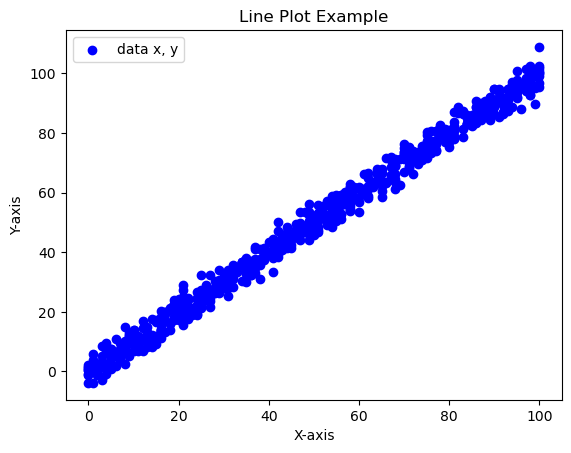

In [7]:
# Create a line plot
plt.scatter(data.x, data.y, label='data x, y', color='blue', marker='o')

# Add title and labels
plt.title('Line Plot Example')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')

# Add a legend
plt.legend()

# Show the plot
plt.show()

#### Data Cleaning

In [48]:
# scaling
# data.x = np.log10(data.x)
def describe(data):
    print("|describe|", data.describe())
    print("-------------Divider--------------")
    print("|info|", data.info())
    print("-------------Divider--------------")
    print("|NULL|", data.isna().sum())
describe(data)

|describe|                 x           y
count  699.000000  699.000000
mean     0.500143    0.477146
std      0.289546    0.258263
min      0.000000    0.000000
25%      0.250000    0.255253
50%      0.490000    0.468568
75%      0.750000    0.698862
max      1.000000    1.000000
-------------Divider--------------
<class 'pandas.core.frame.DataFrame'>
Index: 699 entries, 0 to 699
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       699 non-null    float64
 1   y       699 non-null    float64
dtypes: float64(2)
memory usage: 16.4 KB
|info| None
-------------Divider--------------
|NULL| x    0
y    0
dtype: int64


### Feature Engineering

In [9]:
# Drop Null Values
data = data.dropna()


In [16]:

### Min-Max Scaling
data.x = min_max_scaling(data.x, data.x.min(), data.x.max())
data.y = min_max_scaling(data.y, data.y.min(), data.y.max())

# data.x = tanh_normalize(data.x, data.x.mean(), data.x.std())
# data.y = tanh_normalize(data.y, data.y.mean(), data.y.std())

data

/var/folders/pb/g2k3gt9d0y3flmhl3h6j21dm0000gn/T/ipykernel_4989/2641670216.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.x = min_max_scaling(data.x, data.x.min(), data.x.max())
/var/folders/pb/g2k3gt9d0y3flmhl3h6j21dm0000gn/T/ipykernel_4989/2641670216.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.y = min_max_scaling(data.y, data.y.min(), data.y.max())


,x,y
0,0.24,0.225260
1,0.50,0.455183
2,0.15,0.186836
3,0.38,0.358671
4,0.87,0.808515
...,...,...
695,0.58,0.553936
696,0.93,0.873602
697,0.82,0.820180
698,0.66,0.598773


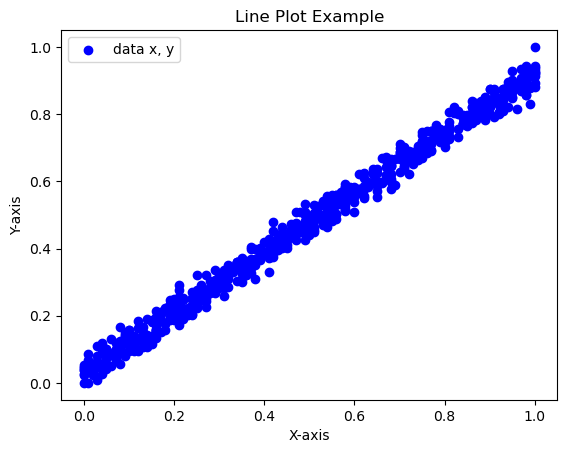

In [11]:
# Create a line plot
plt.scatter(data.x, data.y, label='data x, y', color='blue', marker='o')

# Add title and labels
plt.title('Line Plot Example')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')

# Add a legend
plt.legend()

# Show the plot
plt.show()

### Train Model

##### Splitting the dataset

In [12]:
X = data.drop(columns=['y'])
y = data['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

### Evaluating Model

In [14]:
# Predict the target variable (y) using the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 0.0006102837579227323
R-squared: 0.9910998765243975


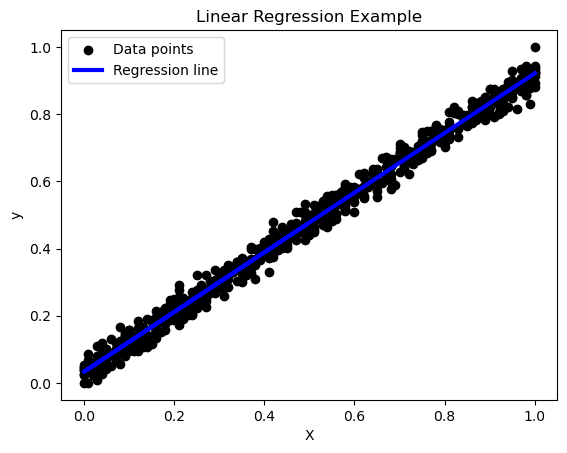

In [18]:
# Plot model
plt.scatter(data.x, data.y, color='black', label='Data points')
plt.plot(X_test, y_pred, color='blue', linewidth=3, label='Regression line')

plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression Example')
plt.legend()
plt.show()

### Test

|describe|                 x           y
count  300.000000  300.000000
mean    50.936667   51.205051
std     28.504286   29.071481
min      0.000000   -3.467884
25%     27.000000   25.676502
50%     53.000000   52.170557
75%     73.000000   74.303007
max    100.000000  105.591837
-------------Divider--------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       300 non-null    int64  
 1   y       300 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 4.8 KB
|info| None
-------------Divider--------------
|NULL| x    0
y    0
dtype: int64


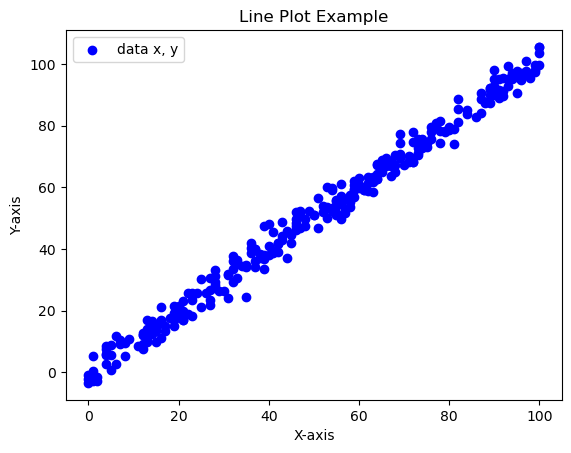

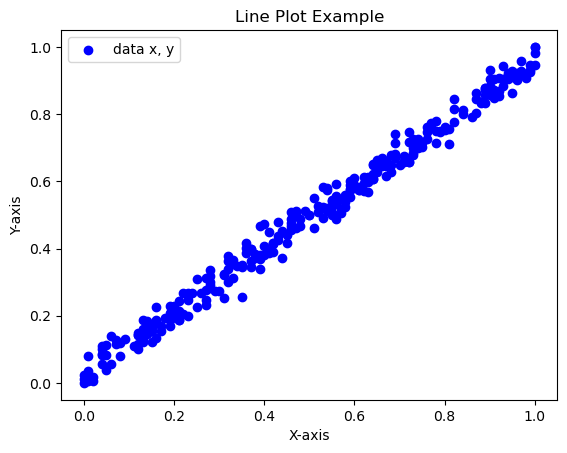

Mean Squared Error: 0.0011561037166772214
R-squared: 0.9836754461258781
      x          y     y_pred      diff
0    77  79.775152  74.750006 -5.025146
1    21  23.177279  20.498486 -2.678793
2    22  25.609262  21.467263 -4.141998
3    20  17.857388  19.529709  1.672321
4    36  41.849864  35.030143 -6.819721
..   ..        ...        ...       ...
295  71  68.545888  68.937343  0.391455
296  46  47.334876  44.717915 -2.616962
297  55  54.090637  53.436909 -0.653728
298  62  63.297171  60.218349 -3.078822
299  47  52.459467  45.686692 -6.772775

[300 rows x 4 columns]


In [83]:
def test():
    orig_test = pd.read_csv(getPath("test.csv"))
    test = orig_test.copy()

    describe(test)

    # Data plot before scaling
    plt.scatter(test.x, test.y, label='data x, y', color='blue', marker='o')
    plt.title('Line Plot Example')
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.legend()
    plt.show()

    ### Min-Max Scaling
    test.x = min_max_scaling(orig_test.x, orig_test.x.min(), orig_test.x.max())
    test.y = min_max_scaling(orig_test.y, orig_test.y.min(), orig_test.y.max())

    # Data plot after scaling 
    plt.scatter(test.x, test.y, label='data x, y', color='blue', marker='o')
    plt.title('Line Plot Example')
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.legend()
    plt.show()

    # Predict
    X_test = test.drop(columns=['y'])
    y_ground_truth = test['y']
    y_pred = model.predict(X_test)

    # Plot model
    plt.scatter(data.x, data.y, color='black', label='Data points')
    plt.plot(X_test, y_pred, color='blue', linewidth=3, label='Regression line')
    
    plt.xlabel('X')
    plt.ylabel('y')
    plt.title('Linear Regression Example')
    plt.legend()
    plt.show()

    # Mean squared Error and R-Squared÷
    mse = mean_squared_error(y_ground_truth, y_pred)
    r2 = r2_score(y_ground_truth, y_pred)
    print("Mean Squared Error:", mse)
    print("R-squared:", r2)

    y_pred = reverse_min_max_scaling(y_pred, orig_test.y.min(), orig_test.y.max())
    result = pd.DataFrame({ 'x': orig_test.x, 'y': orig_test.y, 'y_pred': y_pred, 'diff': y_pred - orig_test.y })
    print(result)
    

test()